In [1]:
import pandas as pd
pd.options.plotting.backend = "plotly"

In [2]:
df = pd.read_csv('Census_Micro.csv')

In [43]:
import plotly.express as px
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [9]:
X = df[['SEX', 'JWTRNS', 'COW', 'SCHL']]
y = df['PERNP'] > 50000

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train, X_test

(        SEX  JWTRNS  COW  SCHL
 98109     2       1    3    21
 100076    2       0    1    21
 43503     2       0    0    16
 648       2       0    1    16
 42294     2       1    1    21
 ...     ...     ...  ...   ...
 63575     2       1    1    19
 78823     1       0    6    21
 17463     2       0    3    16
 71999     1       1    1    19
 89025     1       9    1    21
 
 [76134 rows x 4 columns],
        SEX  JWTRNS  COW  SCHL
 96811    1       1    2    22
 24312    2       0    0    16
 8414     2       1    1    16
 16374    1       0    0    16
 95290    2       1    1    18
 ...    ...     ...  ...   ...
 6467     1       1    6    21
 52221    1       0    0    10
 65516    1       1    1    19
 15007    2       1    1    20
 62774    2      11    1    21
 
 [25378 rows x 4 columns])

In [44]:
rf = HistGradientBoostingClassifier()
rf.fit(X_train, y_train)


HistGradientBoostingClassifier()

In [45]:
from sklearn.metrics import accuracy_score, precision_recall_curve, f1_score, PrecisionRecallDisplay
y_pred = rf.predict(X_test)

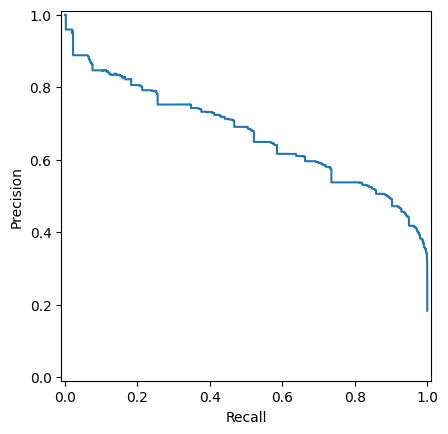

In [46]:
p, r, _ = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])
disp = PrecisionRecallDisplay(precision=p, recall=r).plot()

In [47]:
print(y_pred[X_test['SEX'] == 1].mean())
print(y_pred[X_test['SEX'] == 2].mean())

0.1898784460157305
0.08537252755843953


In [48]:
print(y_pred[y_test & (X_test['SEX'] == 1)].mean())
print(y_pred[y_test & (X_test['SEX'] == 2)].mean())

0.5611073598919649
0.42814726840855105


In [49]:
print(y_test[y_pred & (X_test['SEX'] == 1)].mean())
print(y_test[y_pred & (X_test['SEX'] == 2)].mean())

0.695397489539749
0.6602564102564102


In [6]:
px.box(df[df.PERNP < 200000], x='AGEP', y='PERNP')